# **Preprocesado**

*Nuestra tarea consiste en predecir el valor medio de las viviendas en los distritos californianos, dada una serie de características de estos distritos.*

**Etapas**:
* Obtención de los datos
* Estudio de los datos
* Descubriendo y visualizando datos
* Preparando los datos para el modelo



# Inicio

En primer lugar, vamos a importar algunos módulos comunes, asegurarnos de que MatplotLib traza las figuras correctamente y preparar una función para guardar las figuras. También comprobamos que Python 3.5 o posterior está instalado (aunque Python 2.x puede funcionar, está obsoleto por lo que es **altamente** recomendable utilizar Python 3 en su lugar), así como Scikit-Learn ≥0.20.

In [2]:
# Se requiere Python ≥ 3.5
import sys;
assert sys.version_info >= (3, 5)

# Se requiere Scikit-Learn ≥ 0.20
import sklearn;
assert sklearn.__version__ >= "0.20"

# Otros imports
import numpy as np;
import os;

# lo que sigue, sólo en Google Colab
%matplotlib inline

# Más imports
import matplotlib as mpl;
import matplotlib.pyplot as plt;

# tamaño del texto en las etiquetas por defecto
mpl.rc('axes',  labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Obteniendo los datos

## Descargando los datos

Los datos vamos a descargarlos desde un servicio remoto. El github de Aurélien Gerón, autor del libro "*Aprende Machine Learning con Scikit-Learn, Keras y Tensorflow*".

In [3]:
'''
import tarfile;
import urllib.request;

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
HOUSING_PATH = os.path.join("datasets", "housing")
# esta función descarga y descomprime los datos desde una url a un directorio
def fetch_housing_data(housing_url=HOUSING_URL, housing_path='data/'):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
# Y llamamos a la función recién creada para descargar los datos
fetch_housing_data()
# Download the California image
images_path = os.path.join(".", "data")
os.makedirs(images_path, exist_ok=True)
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))
'''

('./data/california.png', <http.client.HTTPMessage at 0x709c5a314500>)

## Primer acercamiento a la estructura de los datos

Cargamos los datos en memoria y hacemos un primer análisis.

In [26]:
import pandas as pd

# Creamos una función que lee el fichreo .csv que acabamos de bajar y descomprimir

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join('data', "housing.csv")
    return pd.read_csv(csv_path)
housing = load_housing_data()
original_housing = housing.copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Observa arriba

* Tenemos columnas con datos **null**: $total\_bedrooms$ tiene menos datos *non-null* que el resto.
* La columna $ocean\_proximity$ no es de tipo numérico (tipo $string$).

Vamos a mirar en esta última, el número de valores distintos.

In [6]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Respecto al resto de columnas, vamos a describirlas mediante un análisis estadístico simple.

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Finalmente, para este apartado, vamos a visualizar la distribución de los valores de las columnas numéricas.

Observa los picos *extraños*.

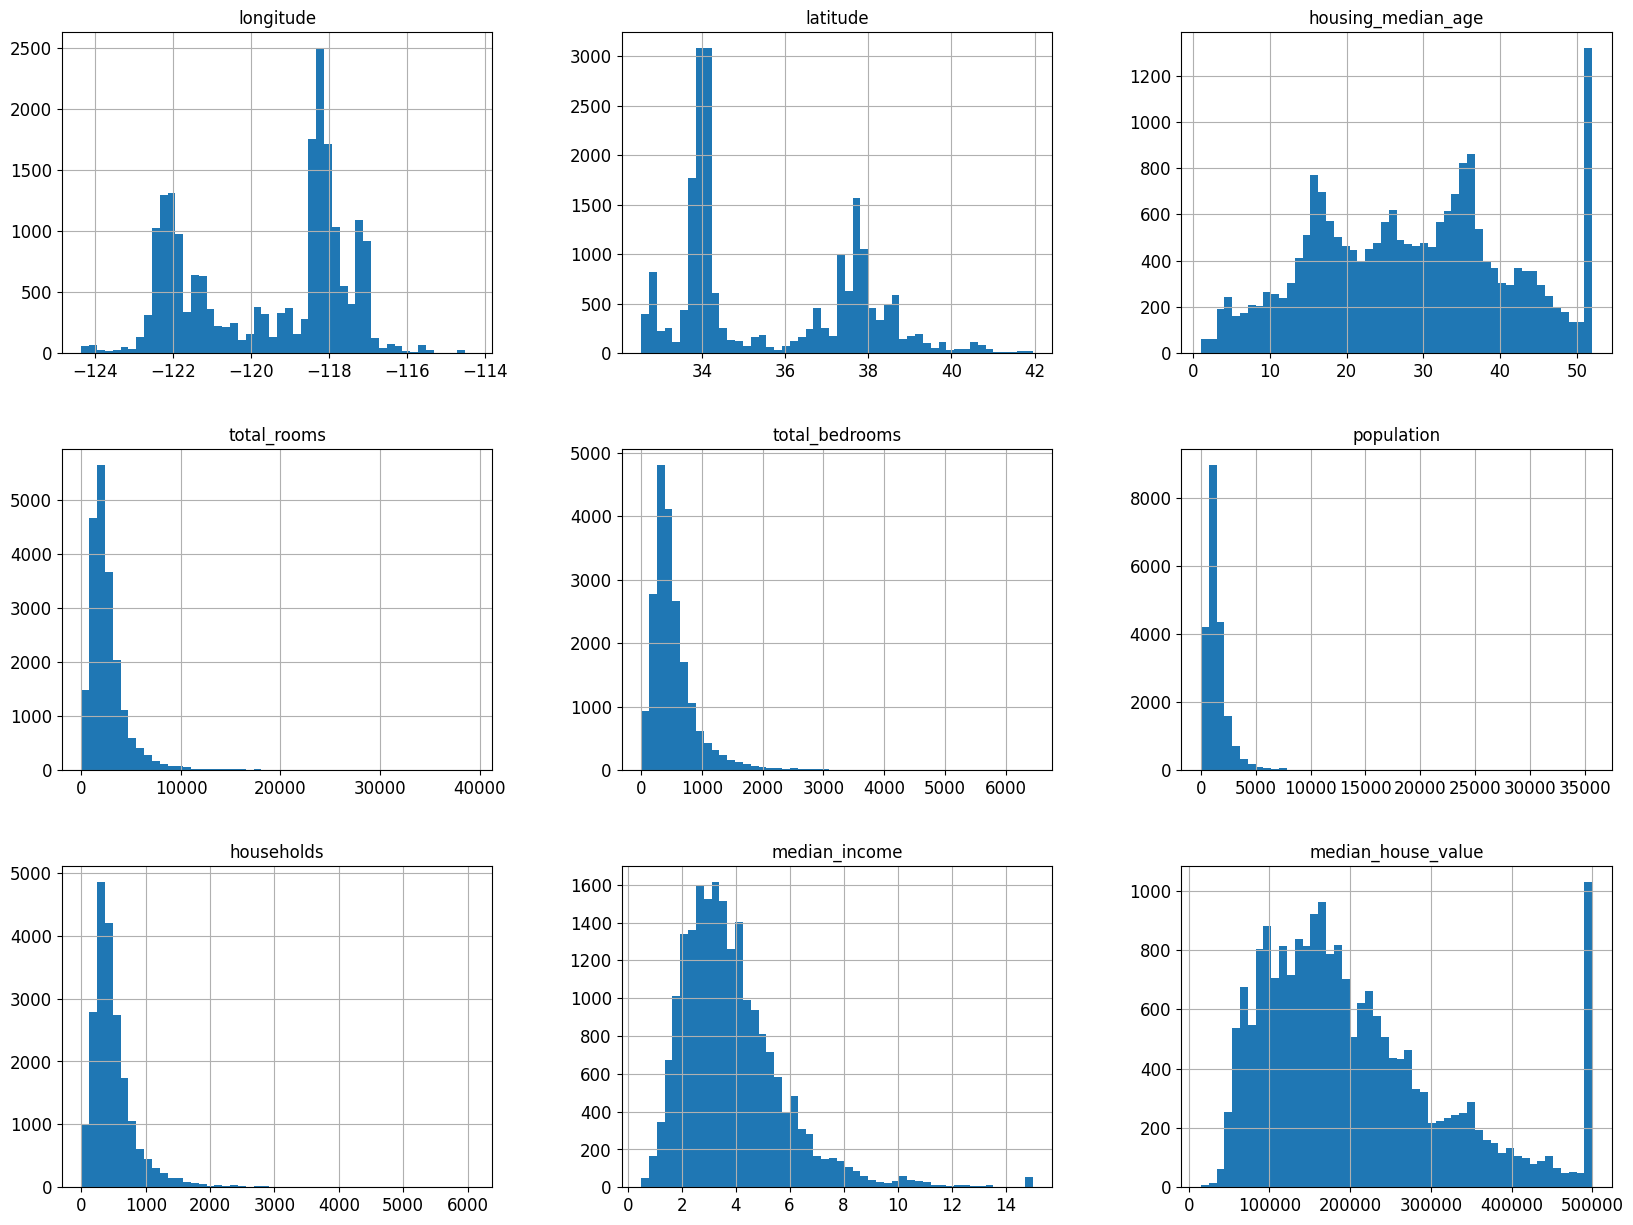

In [8]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

# Descubriendo y visualiando los datos

## Visualizando datos geográficos

Simplemente vamos a hacer una gráfica de tipo $scatter$ de las columnas longitud y latitud.

<Axes: xlabel='longitude', ylabel='latitude'>

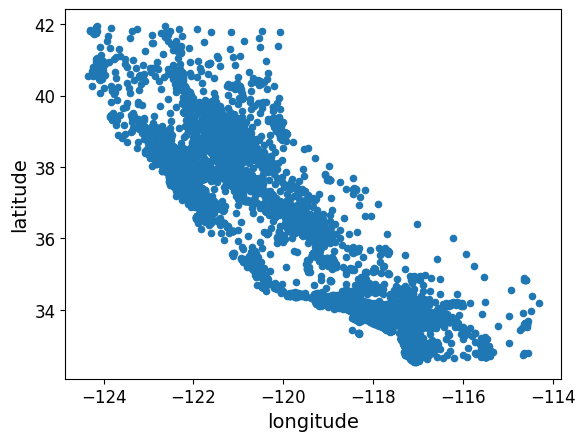

In [9]:
housing.plot(kind="scatter", x="longitude", y="latitude")


Para visualizar un poco mejor las diferentes densidades de los datos geogŕficos, vamos a darle un poco de transparencia a los puntos.

<Axes: xlabel='longitude', ylabel='latitude'>

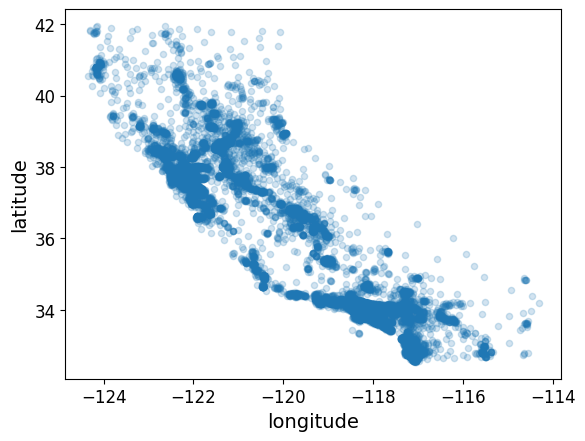

In [10]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2)

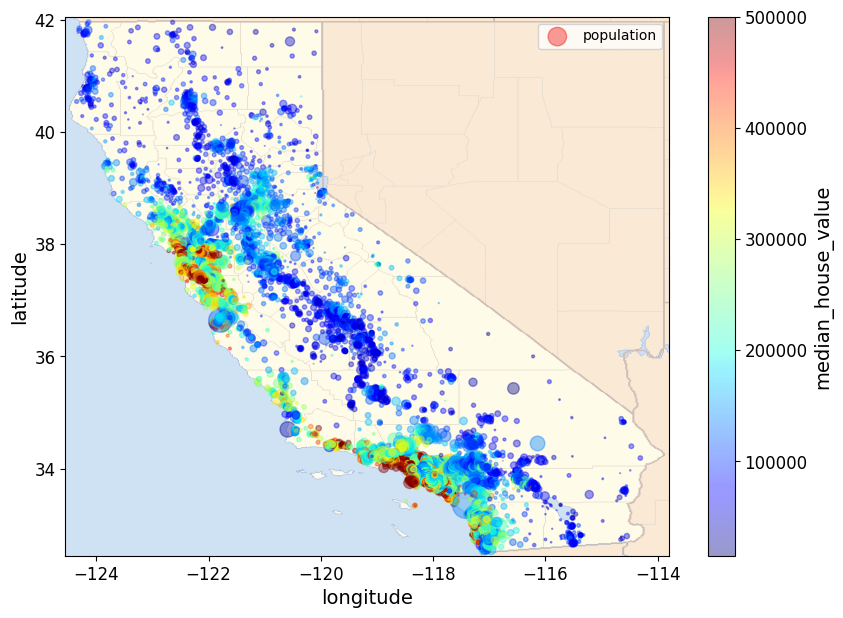

In [11]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
housing.plot(kind="scatter", 
             x="longitude", 
             y="latitude", 
             alpha=0.4,
             s=housing["population"]/100, 
             label="population", 
             figsize=(10,7),
             c="median_house_value", 
             cmap=plt.get_cmap("jet"), 
             colorbar=True,
             sharex=False)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)

Vamos a superponer los datos sobre un mapa real de la zona, ya que sabemos que es California y los datos están indexados en coordenadas geográficas (long/lat).


In [371]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html

!pip install pillow
!pip install basemap
!pip install basemap-data-hires


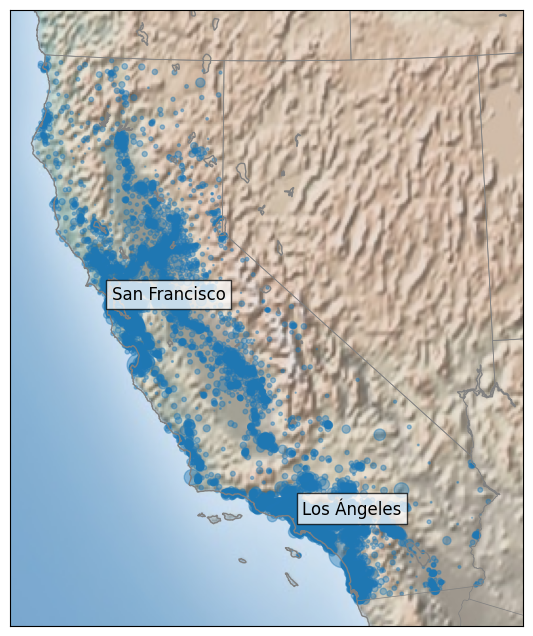

In [372]:
import mpl_toolkits
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(8, 8))

m = Basemap(projection='lcc', 
            resolution='h', 
            lat_0=37.5, 
            lon_0=-119,
            width=1E6, 
            height=1.2E6)

m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

m.scatter(housing["longitude"],
          housing["latitude"],
          latlon=True,         
          s=housing["population"]/100, 
          alpha=0.40)

x, y = m(-118.243683, 34.052235)
plt.text(x, y, 'Los Ángeles', fontsize=12, bbox=dict(facecolor="white", alpha=0.75));

x, y = m(-122.431297, 37.773972)
plt.text(x, y, 'San Francisco', fontsize=12, bbox=dict(facecolor="white", alpha=0.75));


## Creamos el Test Set
Entramos a crear los datos necesarios para el entrenamiento y la evaluación del modelo.
Como vamos a trabajar con numeros aleatorios, sembraremos una semilla estocástica, esto es, vamos a inicializar el generador de números aleatorios con un número, de tal forma que siempre nos proporcionará la misma secuencia de números aleatorios si empezamos con la misma semilla.

In [12]:
# ¿por qué 42? https://es.wikipedia.org/wiki/El_sentido_de_la_vida,_el_universo_y_todo_lo_demás
np.random.seed(42)

La siguiente función se encarga de dividir (split) los datos en dos subconjuntos con un ratio indicado (80%, 20% por ejemplo).

Aurélien lo hace de forma un poco,... enrevesada, pero muy efectiva:

1. Primero obtiene una permutación de los índices (*shuffled*=barajado).
2. Para después quedarse con un porcentaje para el **train set** y el restante para el **test set**.
3. La función devuelve ambos conjuntos de datos.


In [13]:
# divide los datos en train y set sets.
def split_train_test(data, test_ratio):
    # https://numpy.org/doc/stable/reference/random/generated/numpy.random.permutation.html
    shuffled_indices = np.random.permutation(len(data)); 
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
train_set, test_set = split_train_test(housing, test_ratio=0.2)
len(test_set)

4128

Hay otras posibilidades en lugar de permutar aleatoriamente que son repetibles como calcular el hash de los índices. En el espacio de huellas de tamaño fijo p.ej 2³² me quedo para testear aquellos índices cuyo hash sea inferior a 2³²*0,2 si el test set es del 20%. La función que hace el mapeo se llama test_set_check 

In [14]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32


The implementation of `test_set_check()` above works fine in both Python 2 and Python 3. In earlier releases, the following implementation was proposed, which supported any hash function, but was much slower and did not support Python 2:

In [15]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

If you want an implementation that supports any hash function and is compatible with both Python 2 and Python 3, here is one:

In [16]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

Por último la función que hace la partición que recibe como parámetros el dataframe, el porcentaje reservado para test en tanto por uno y el nombre de la columna con los índices

In [28]:

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]
# adds an `index` column
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [29]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-122222.15
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,-122222.15
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,-122222.15
13,13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY,-122222.16


Si no te quieres comer el coco llamas a la función train_test_split de sklearn y mostramos el tamaño de cada conjunto separado de los datos iniciales.

In [30]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
len(test_set)

4128

## Buscando correlaciones

In [31]:
corr_matrix = housing.corr(numeric_only = True)

Centrémonos en las correlaciones de la columna a predecir ($median\_house\_value$) con el resto de columnas numéricas.

In [32]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

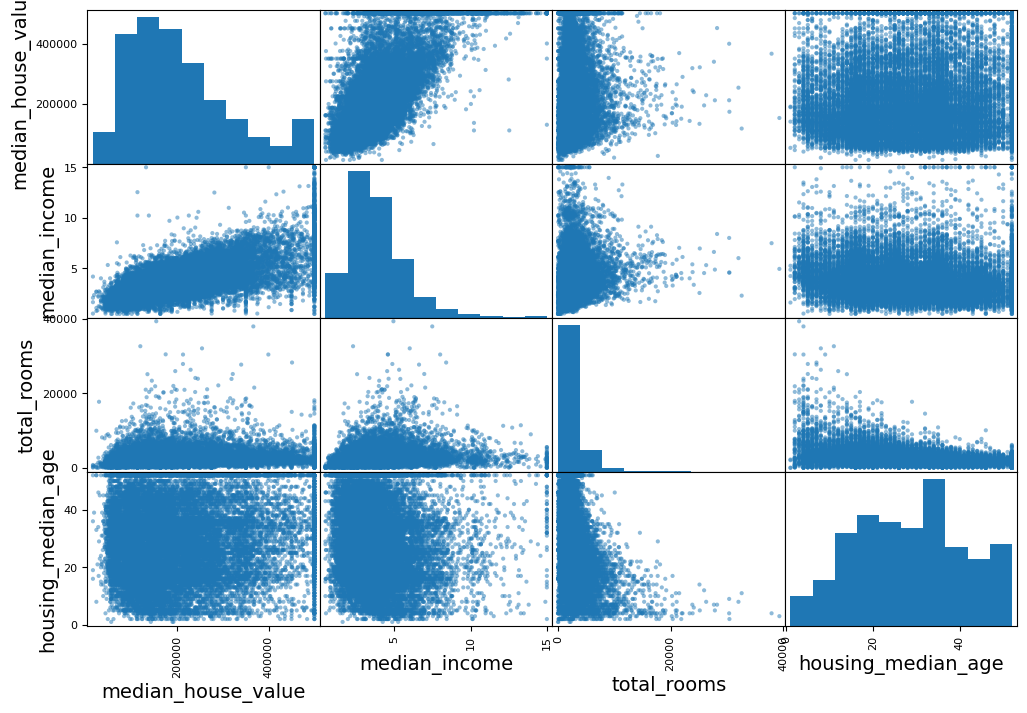

In [33]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8));


Miremos con más detenimiento la correlación del valor medio de las casas, con los ingresos medios de la zona. Hay una clara correlación (~0.7), aunque no una identidad (1).

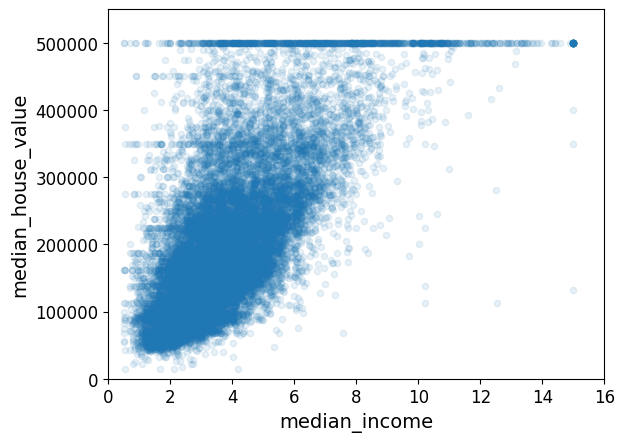

In [34]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1);
plt.axis([0, 16, 0, 550000]);


La columna $median\_income$, que representa los ingresos medios de los habitantes de la zona, parece estar en un formato numérico (una gradación de 0 a 15, parece). Vamos a transformarlo a una gradación de 5 grupos (de 1 a 5, sin decimales).

<Axes: >

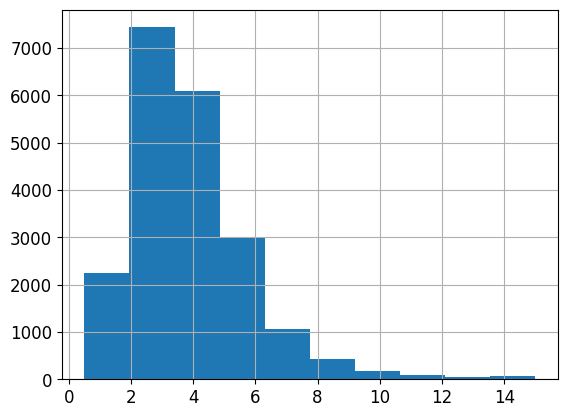

In [35]:
housing["median_income"].hist()

In [36]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                               labels=[1, 2, 3, 4, 5])
# Necesario porque sino la muy puta falla cuando hacemos median
# housing["income_cat"]=pd.to_numeric(housing["income_cat"])

In [37]:
housing["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

Fijaros que los valores ahora están un poco más balanceados (dentro de las limitaciones de los datos) y las rentas altas están más agrupadas.

<Axes: >

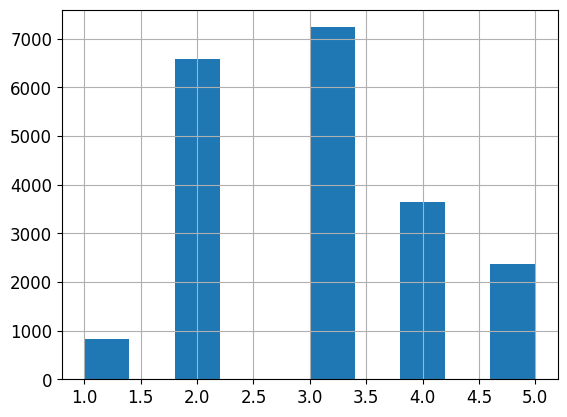

In [38]:
housing["income_cat"].hist()

Puede pasar que al seleccionar los datos de test y entrenamiento la distribucion del poder adquisitivo se desvirtue. Vamos a usar StratifiedShuffleSplit para hacer las particiones conservando las proporciones de cada categoría de income_cat

In [39]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [40]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [41]:
housing["income_cat"].value_counts() / len(housing)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [42]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [43]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


Podemos ver que la funcion train_test_split no garantiza que se mantengan las proporciones de cada categoría de income_cat en las dos particiones.

## Experimentando con combinaciones de atributos

Siempre podemos buscar oro debajo de las piedras. Esto no significa que lo encontremos, pero quizá encontremos algo diferente y valioso. Las correlaciones ocultas son aquellas que no se muestran en los datos pero pueden aparecer cuando combinamos uno o más de las columnas en expresiones aritméticas.

Para saber qué operaciones hacer, consulta a los/las expertas en materia inmobiliaria.

In [44]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [45]:
corr_matrix = housing.corr(numeric_only = True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

Fíjate:
* Ha aparecido $rooms\_per\_household$ con un ídice de correlación superior al de sus precursoras.
* $bedrooms\_per\_room$ igualmente ha emergido con un índice de correlación alto y negativo, lo cual también ayuda.

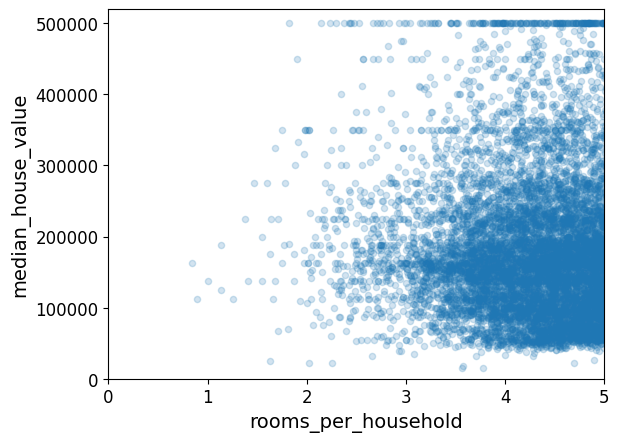

In [46]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value", alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

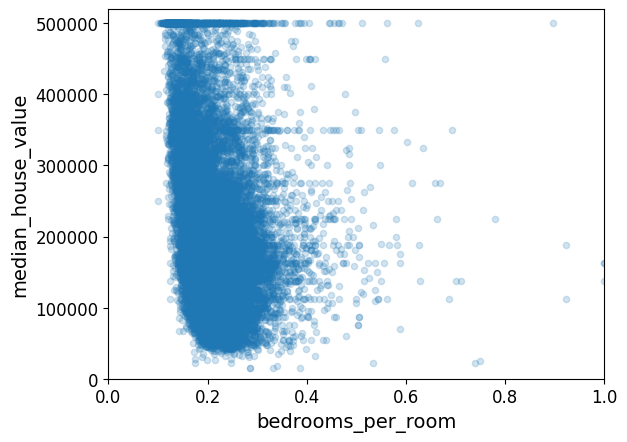

In [47]:
housing.plot(kind="scatter", x="bedrooms_per_room", y="median_house_value", alpha=0.2)
plt.axis([0, 1, 0, 520000])
plt.show()

In [48]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 20640 non-null  float64 
 1   latitude                  20640 non-null  float64 
 2   housing_median_age        20640 non-null  float64 
 3   total_rooms               20640 non-null  float64 
 4   total_bedrooms            20433 non-null  float64 
 5   population                20640 non-null  float64 
 6   households                20640 non-null  float64 
 7   median_income             20640 non-null  float64 
 8   median_house_value        20640 non-null  float64 
 9   ocean_proximity           20640 non-null  object  
 10  income_cat                20640 non-null  category
 11  rooms_per_household       20640 non-null  float64 
 12  bedrooms_per_room         20433 non-null  float64 
 13  population_per_household  20640 non-null  floa

De cara a automatizar este proceso crearemos una clase llamada CombinedAtributesAdder cuyo metodo transform añade a un dataset las nuevas columnas.

In [49]:
from sklearn.base import BaseEstimator, TransformerMixin

# get the column indices
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


Para usar esta clase solo tenemos que instanciarla, llamar a su metodo transform para obtener un array aumentado con las nuevas columnas y convertirlo a un Dataset

In [50]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=True)
housing_extra_attribs = attr_adder.transform(original_housing.values)
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(original_housing.columns)+["rooms_per_household", "bedrooms_per_room", "population_per_household"],
    index=housing.index)
housing_extra_attribs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   longitude                 20640 non-null  object
 1   latitude                  20640 non-null  object
 2   housing_median_age        20640 non-null  object
 3   total_rooms               20640 non-null  object
 4   total_bedrooms            20433 non-null  object
 5   population                20640 non-null  object
 6   households                20640 non-null  object
 7   median_income             20640 non-null  object
 8   median_house_value        20640 non-null  object
 9   ocean_proximity           20640 non-null  object
 10  rooms_per_household       20640 non-null  object
 11  bedrooms_per_room         20640 non-null  object
 12  population_per_household  20433 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB


Fíjate que no hemos añadido la columna bedrooms_per_room

## Procesar atributos numéricos

¿Recuerdas que $total\_bedrooms$ tenía celdas **null**?
En el libro se ven tres opciones:

```python
housing.dropna(subset=["total_bedrooms"])    # option 1
housing.drop("total_bedrooms", axis=1)       # option 2
median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)
```

Para ver como funciona cada una, vamos a crear una copia de las filas del dataset, que tienen un valor nulo en alguna columna:

In [51]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY,3,5.761468,NaN,2.614679
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY,2,3.830116,NaN,2.826255
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY,2,4.048704,NaN,2.938727
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY,4,6.102740,NaN,2.630137
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY,3,4.633540,NaN,2.403727


In [52]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household


In [53]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
290,-122.16,37.77,47.0,1256.0,570.0,218.0,4.3750,161900.0,NEAR BAY,3,5.761468,NaN,2.614679
341,-122.17,37.75,38.0,992.0,732.0,259.0,1.6196,85100.0,NEAR BAY,2,3.830116,NaN,2.826255
538,-122.28,37.78,29.0,5154.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY,2,4.048704,NaN,2.938727
563,-122.24,37.75,45.0,891.0,384.0,146.0,4.9489,247100.0,NEAR BAY,4,6.102740,NaN,2.630137
696,-122.10,37.69,41.0,746.0,387.0,161.0,3.9063,178400.0,NEAR BAY,3,4.633540,NaN,2.403727


In [54]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3
sample_incomplete_rows

/tmp/ipykernel_32402/3907893688.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,161900.0,NEAR BAY,3,5.761468,NaN,2.614679
341,-122.17,37.75,38.0,992.0,435.0,732.0,259.0,1.6196,85100.0,NEAR BAY,2,3.830116,NaN,2.826255
538,-122.28,37.78,29.0,5154.0,435.0,3741.0,1273.0,2.5762,173400.0,NEAR BAY,2,4.048704,NaN,2.938727
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489,247100.0,NEAR BAY,4,6.102740,NaN,2.630137
696,-122.10,37.69,41.0,746.0,435.0,387.0,161.0,3.9063,178400.0,NEAR BAY,3,4.633540,NaN,2.403727


La clase Imputer de SckLearn puede hacer lo último de forma automática en todas las columnas numéricas

In [405]:
from sklearn.impute import SimpleImputer
# Eliminamos las columnas de texto
housing_num = housing.drop(["ocean_proximity", "income_cat"], axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])
imputer = SimpleImputer(strategy="median")
imputer.fit(housing_num)

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [406]:
imputer.statistics_

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  5.22912879e+00,  2.03162434e-01,  2.81811565e+00])

Check that this is the same as manually computing the median of each attribute:

In [407]:
housing_num.median().values

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  5.22912879e+00,  2.03162434e-01,  2.81811565e+00])

Transform the training set:

In [408]:

X = imputer.transform(housing_num)
# Como imputer.transform devuelve un array debemos recrear un DataFrame
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)
#Comprobamos que no quedan valores nulos
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
290,-122.16,37.77,47.0,1256.0,435.0,570.0,218.0,4.3750,161900.0,5.761468,0.203162,2.614679
341,-122.17,37.75,38.0,992.0,435.0,732.0,259.0,1.6196,85100.0,3.830116,0.203162,2.826255
538,-122.28,37.78,29.0,5154.0,435.0,3741.0,1273.0,2.5762,173400.0,4.048704,0.203162,2.938727
563,-122.24,37.75,45.0,891.0,435.0,384.0,146.0,4.9489,247100.0,6.102740,0.203162,2.630137
696,-122.10,37.69,41.0,746.0,435.0,387.0,161.0,3.9063,178400.0,4.633540,0.203162,2.403727


En realidad podemos crear una tubería para procesar los atributos numéricos, la imputacion de valores no nulos, añadir dos columnas extra y normalizar los datos. Nos dejamos fuera el cuantizador income_cat. Fíjate que usaremos la clase CombinedAttributesAdder así que no te olvides de ejecutar esa celda

In [409]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])


Para usarla basta con instanciar la clase num_pipeline y pasarle un dataset con los atributos numéricos exclusivamente

In [410]:
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.62855945,
        -0.04959654, -1.02998783],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.32704136,
        -0.09251223, -0.8888972 ],
       [-1.33282653,  1.03850269,  1.85618152, ...,  1.15562047,
        -0.02584253, -1.29168566],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.09031802,
        -0.0717345 ,  0.02113407],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.04021111,
        -0.09122515,  0.09346655],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.07044252,
        -0.04368215,  0.11327519]], shape=(20640, 15))

## Procesar atributos categóricos

¿Recuerdas que $ocean\_proximity$ era de tipo $string$?

**NOTA**: *en mi notebook he tenido la suerte de que todos los null caigan en el test_set*.

In [411]:
housing_cat = housing[["ocean_proximity"]]
housing_cat["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Tenemos dos posibilidades:

1. Codificar cada etiqueta de $ocean\_proximity$ como un número: con lo que estamos introduciendo información exterior, o
2. Hacer un OneHotEncoding ...

Lo que sigue es cómo asignar un número a cada etiqueda de $ocean\_proximity$

In [412]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

Teniendo en este campo del objeto, la lista para poder recuperar el nombre de la etiqueta a partir del número.

In [413]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Otra forma, mucho mejor, es crear tantas columnas como etiquetas diferentes tiene la columna categórica (en este caso 5) y poner 0 o 1 (false, true) si la instancia tiene o no dicha etiqueta.

Así no introducimos información nueva. Pero añadimos columnas.

In [414]:
from sklearn.preprocessing import OneHotEncoder;
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 20640 stored elements and shape (20640, 5)>

Por defecto, `OneHotEncoder` devuelve un sparse array (array/matríz con muchos ceros y muy comprimible), pero podemos convertirlo a un array/matriz denso de la siguiente manera:

In [415]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], shape=(20640, 5))

También se lo podíamos indicar en los parámetros: `sparse=False`:

In [416]:
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], shape=(20640, 5))

In [417]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Ahora podemos sustituir la columna `ocean_proximity` por sus `OneHotEncoder`.

In [ ]:
housing.reset_index(drop=True, inplace=True)
housing_cat=housing.join(pd.DataFrame(housing_cat_1hot, columns=[cat for cat in cat_encoder.categories_[0]]))
housing_cat.drop(["ocean_proximity","income_cat"], axis=1, inplace=True)
housing_cat.rename({"<1H OCEAN":"OCEAN"}, axis=1, inplace =True)
housing_cat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   level_0                   20640 non-null  int64  
 1   index                     20640 non-null  int64  
 2   longitude                 20640 non-null  float64
 3   latitude                  20640 non-null  float64
 4   housing_median_age        20640 non-null  float64
 5   total_rooms               20640 non-null  float64
 6   total_bedrooms            20433 non-null  float64
 7   population                20640 non-null  float64
 8   households                20640 non-null  float64
 9   median_income             20640 non-null  float64
 10  median_house_value        20640 non-null  float64
 11  rooms_per_household       20640 non-null  float64
 12  bedrooms_per_room         20433 non-null  float64
 13  population_per_household  20640 non-null  float64
 14  <OCEAN

# Creando una pipeline
Una vez que hemos explorado los datos y seleccionado las transformaciones adecuadas podemos automatizarlas con un ColumnTransformer que aplica la tubería num_pipeline a los atributos numéricos y OneHotEncoder a los categóricos

In [428]:
from sklearn.compose import ColumnTransformer
housing_num = original_housing.drop("ocean_proximity", axis=1)
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(original_housing)
num_attribs


['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

Ten en cuenta que el resultado es ahora un array

In [429]:
housing_prepared

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.        ,
         1.        ,  0.        ],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.        ,
         1.        ,  0.        ],
       [-1.33282653,  1.03850269,  1.85618152, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87362627,  1.77823747, -0.84539315, ...,  0.        ,
         0.        ,  0.        ],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.        ,
         0.        ,  0.        ]], shape=(20640, 17))

In [430]:
housing_prepared.shape

(20640, 17)